# Spectrograms Benchmark
This notebook is used for testing and benchmarking performance of a list/table of spectrograms of various baseline and polarisation.

In [1]:
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from model.message_topic import MessageTopic
from model.protocol import Protocol
import mock_payload_generator as payload_generator
import utils
from producer import Producer


In [2]:
producer = Producer()


Producer:start: BROKER_INSTANCE = localhost:9092


### Plot Payload Size Statistics

In [3]:
# generate payload size data for the benchmark

data = []
unit = "MB"

for num_spectrograms in range(10, 110, 10):
    for num_channels in range(10000, 80000, 10000):
        _, size = gp.spectrogram_protobus(num_spectrograms, num_channels)
        a = {
            "Size" : utils.convert_bytes(size, unit),
            "Spectrograms": num_spectrograms,
            "Channels": num_channels,
            "Encoding": "ProtoBuf",
        }
        data.append(a)
        
        _, size = gp.spectrogram_json(num_spectrograms, num_channels)
        b = {
            "Size" : utils.convert_bytes(size, unit),
            "Spectrograms": num_spectrograms,
            "Channels": num_channels,
            "Encoding": "JSON (UTF-8)",
        }
        data.append(b)

NameError: name 'gp' is not defined

In [ ]:
# prepare data for plotting

df_size = pd.DataFrame(data)

col_size = df_size["Size"]
max = col_size.max()
min = col_size.min()

# select ProtoBuf rows
df_size1 = df_size.loc[df_size["Encoding"] == "ProtoBuf"]
df_size1 = df_size1.pivot("Channels", "Spectrograms", "Size")
df_size1 = df_size1.sort_values(by=['Channels'],  ascending=False)

# select JSON rows
df_size2 = df_size.loc[df_size["Encoding"] == "JSON (UTF-8)"]
df_size2 = df_size2.pivot("Channels", "Spectrograms", "Size")
df_size2 = df_size2.sort_values(by=['Channels'],  ascending=False)

In [ ]:
df_size

,Size,Spectrograms,Channels,Encoding
0,0.0,10,10000,ProtoBuf
1,0.0,10,10000,JSON (UTF-8)
2,0.0,10,20000,ProtoBuf
3,1.0,10,20000,JSON (UTF-8)
4,0.0,10,30000,ProtoBuf
...,...,...,...,...
135,22.0,100,50000,JSON (UTF-8)
136,9.0,100,60000,ProtoBuf
137,27.0,100,60000,JSON (UTF-8)
138,11.0,100,70000,ProtoBuf


In [4]:
df_size1

NameError: name 'df_size1' is not defined

NameError: name 'df_size1' is not defined

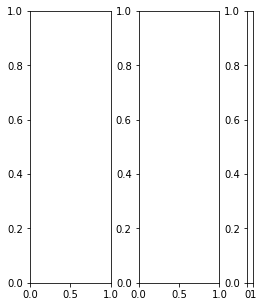

In [5]:

cmaps = ["Pastel1", "RdYlBu_r", "YlGnBu", "Spectral_r", "Set3", "PuBuGn", "PuBu", "PuOr_r", "RdBu_r", ]

# fig, ax =plt.subplots(1,2, figsize=(5,5))
fig, ax = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[4,4,.3]), figsize=(4,5))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

p1 = sns.heatmap(df_size1, cmap=cmaps[0], ax=ax[0], vmin=min, vmax=max, cbar=False)
p2 = sns.heatmap(df_size2, cmap=cmaps[0], ax=ax[1], vmin=min, vmax=max, cbar=False)
fig.colorbar(ax[1].collections[0], cax=ax[2])

p1.set_xlabel(f"Spectrograms", fontsize=14)
p1.set_ylabel("Channels", fontsize=14)

p2.set_xlabel("Spectrograms", fontsize=14)
p2.set_ylabel(f"", fontsize=0)

plt.show()

### Plot Payload Decoding Time

In [6]:
# generate payload and send to producer of broker

protocol = "spectrogram-protobuf"

for num_spectrograms in range(10, 110, 10):
    for num_channels in range(10000, 80000, 10000):
        for itr in range(5):
            sleep(1)
            payload, _ = gp.spectrogram_protobus(num_spectrograms, num_channels)
            await produce(payload, protocol)


NameError: name 'gp' is not defined

In [8]:
protocol = "spectrogram-json"

for num_spectrograms in range(10, 110, 10):
    for num_channels in range(10000, 80000, 10000):
        for itr in range(5):
            sleep(1)
            payload, _ = gp.spectrogram_json(num_spectrograms, num_channels)
            await produce(payload, protocol)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f243e556f40>
Task was destroyed but it is pending!
task: <Task pending name='Task-3614' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f243ea26b50>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f243ea26730>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f243d796be0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3634' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f244064ea90>()]> cb=[Sender._fail_all

In [32]:
protobuf_decoding_time = [
    14.300000004470348,
    7.299999997019768,
    6.399999998509884,
    2.2000000029802322,
    2.6999999955296516,
    3.399999998509884,
    5.100000001490116,
    2.9000000059604645,
    2.600000001490116,
    3.2999999970197678,
    3.899999998509884,
    4.4000000059604645,
    4.399999998509884,
    4.299999997019768,
    3.8000000044703484,
    5.700000002980232,
    8.700000002980232,
    5.5,
    7,
    5,
    6.0999999940395355,
    7.300000004470348,
    6.200000002980232,
    7.399999998509884,
    6.5,
    10,
    9.599999994039536,
    7.800000004470348,
    8.899999998509884,
    9,
    9.399999998509884,
    8.899999998509884,
    9.5,
    11.200000002980232,
    9.200000002980232,
    2.399999998509884,
    3.2000000029802322,
    3.2999999970197678,
    2.5,
    3.2999999970197678,
    5.600000001490116,
    5.5999999940395355,
    13.800000004470348,
    15.5,
    6.100000001490116,
    7.5,
    7.9000000059604645,
    7.899999998509884,
    8.100000001490116,
    8.799999997019768,
    9.600000001490116,
    11.300000004470348,
    11,
    10.799999997019768,
    9.800000004470348,
    13,
    12.100000001490116,
    11.5,
    11.700000002980232,
    12,
    15.399999998509884,
    16.200000002980232,
    17.599999994039536,
    16.399999998509884,
    15.599999994039536,
    17.5,
    16.80000000447035,
    18.69999999552965,
    16.900000005960464,
    17.69999999552965,
    3.899999998509884,
    3.600000001490116,
    3.4000000059604645,
    3.100000001490116,
    4.399999998509884,
    6.700000002980232,
    7.300000004470348,
    7.699999995529652,
    6.9000000059604645,
    7.200000002980232,
    10.299999997019768,
    11.600000001490116,
    12.100000001490116,
    10.399999998509884,
    10.5,
    15.899999998509884,
    15.600000001490116,
    15.399999998509884,
    15.100000001490116,
    14.899999998509884,
    18.200000002980232,
    17.299999997019768,
    17.899999998509884,
    17.69999999552965,
    18.599999994039536,
    23.799999997019768,
    23.100000001490116,
    23.100000001490116,
    22.900000005960464,
    23.399999998509884,
    25.200000002980232,
    25.30000000447035,
    25.399999998509884,
    25.600000001490116,
    26.5,
    4.299999997019768,
    4.799999997019768,
    4.299999997019768,
    4.5,
    4.600000001490116,
    10.399999998509884,
    9.600000001490116,
    9.100000001490116,
    9.899999998509884,
    9.899999998509884,
    14.100000001490116,
    14.200000002980232,
    14.5,
    13.600000001490116,
    14.100000001490116,
    23.399999998509884,
    20,
    37.899999998509884,
    19.399999998509884,
    24.899999998509884,
    24,
    29.599999994039536,
    22.69999999552965,
    29.100000001490116,
    23.200000002980232,
    42.5,
    32,
    32.100000001490116,
    30.600000001490116,
    30.700000002980232,
    37.900000005960464,
    40,
    33.600000001490116,
    38.099999994039536,
    38.5,
    5.899999998509884,
    5.899999998509884,
    6.5,
    5.600000001490116,
    5.899999998509884,
    12.600000001490116,
    15.200000002980232,
    13.699999995529652,
    12.399999998509884,
    14.800000004470348,
    17.5,
    16.700000002980232,
    16.80000000447035,
    16.69999999552965,
    17.299999997019768,
    32,
    25.100000001490116,
    25.100000001490116,
    24.80000000447035,
    25.80000000447035,
    33.69999999552965,
    28.299999997019768,
    28.600000001490116,
    28.899999998509884,
    35.399999998509884,
    45.600000001490116,
    47,
    51.5,
    37.80000000447035,
    38.30000000447035,
    46.400000005960464,
    50.30000000447035,
    43.20000000298023,
    41.30000000447035,
    60,
    6.399999998509884,
    7.700000002980232,
    8.199999995529652,
    6.199999995529652,
    6.100000001490116,
    14.699999995529652,
    15.799999997019768,
    15.299999997019768,
    15.799999997019768,
    14.600000001490116,
    27.700000002980232,
    21.69999999552965,
    20.400000005960464,
    20.5,
    28.600000001490116,
    34.30000000447035,
    32.399999998509884,
    29.5,
    30.100000001490116,
    29,
    36.600000001490116,
    35.099999994039536,
    36,
    35,
    34.79999999701977,
    54.70000000298023,
    57.5,
    52.29999999701977,
    52.5,
    46.20000000298023,
    59.100000001490116,
    61.20000000298023,
    58.29999999701977,
    58.5,
    56.399999998509884,
    10,
    8.800000004470348,
    7.5,
    8,
    7.800000004470348,
    17.899999998509884,
    21.80000000447035,
    18.69999999552965,
    22.399999998509884,
    17.69999999552965,
    32.69999999552965,
    23.899999998509884,
    29.200000002980232,
    23.5,
    25.299999997019768,
    33.80000000447035,
    35.600000001490116,
    34.600000001490116,
    35.69999999552965,
    33.900000005960464,
    46.79999999701977,
    46.80000000447035,
    40,
    40.099999994039536,
    41.29999999701977,
    63.70000000298023,
    68.30000000447035,
    61.70000000298023,
    60.100000001490116,
    59.399999998509884,
    67.20000000298023,
    67.29999999701977,
    67.09999999403954,
    68.40000000596046,
    67.89999999850988,
    9.399999998509884,
    9,
    9.799999997019768,
    9.199999995529652,
    9.200000002980232,
    20.700000002980232,
    19.5,
    19.399999998509884,
    19.899999998509884,
    20.600000001490116,
    27,
    27.5,
    26.899999998509884,
    26.600000001490116,
    26.80000000447035,
    47.099999994039536,
    48.399999998509884,
    44.900000005960464,
    39.29999999701977,
    45.600000001490116,
    53.69999999552965,
    52.30000000447035,
    50.29999999701977,
    52.899999998509884,
    51.79999999701977,
    72.89999999850988,
    73.69999999552965,
    69.20000000298023,
    70.90000000596046,
    71.10000000149012,
    79.20000000298023,
    78.19999999552965,
    73.80000000447035,
    78.29999999701977,
    76.5,
    11.899999998509884,
    11.199999995529652,
    12,
    10.200000002980232,
    10.800000004470348,
    41.100000001490116,
    22.900000005960464,
    27.399999998509884,
    26.200000002980232,
    27.19999999552965,
    35.79999999701977,
    45.20000000298023,
    30.399999998509884,
    30.5,
    31.399999998509884,
    53.79999999701977,
    57.5,
    45.20000000298023,
    43.899999998509884,
    51,
    62.19999999552965,
    55.899999998509884,
    51.899999998509884,
    56.79999999701977,
    61.899999998509884,
    82.39999999850988,
    83.40000000596046,
    80,
    89.5,
    97.89999999850988,
    100.5,
    98.60000000149012,
    97.5,
    95.5,
    100.29999999701977,
    13.799999997019768,
    13.399999998509884,
    12.5,
    11.399999998509884,
    11.100000001490116,
    32.399999998509884,
    26.900000005960464,
    27.099999994039536,
    26,
    26.80000000447035,
    38.399999998509884,
    44.899999998509884,
    34.100000001490116,
    33.29999999701977,
    33,
    65.69999999552965,
    62.70000000298023,
    58.5,
    57,
    57.5,
    68.60000000149012,
    67.39999999850988,
    78.20000000298023,
    65.10000000149012,
    69.79999999701977,
    88,
    90,
    94.70000000298023,
    100.20000000298023,
    100.60000000149012,
    106.39999999850988,
    107.29999999701977,
    107.79999999701977,
    100.39999999850988,
    103.5
]

In [33]:
json_decoding_time = [
    1.3999999985098839,
    1.6000000014901161,
    1.3000000044703484,
    1.5,
    1.3000000044703484,
    2.8000000044703484,
    2.5,
    2.5,
    2.600000001490116,
    3.0999999940395355,
    5.399999998509884,
    7.199999995529652,
    4.5999999940395355,
    4.5,
    6.100000001490116,
    5.899999998509884,
    6.399999998509884,
    5.899999998509884,
    6.299999997019768,
    6,
    9.300000004470348,
    7.100000001490116,
    9.400000005960464,
    8,
    11.699999995529652,
    8.799999997019768,
    13,
    9.799999997019768,
    12.300000004470348,
    8.799999997019768,
    13,
    10.5,
    10,
    13.799999997019768,
    10.600000001490116,
    2.5,
    2.600000001490116,
    3.100000001490116,
    2.5,
    6.100000001490116,
    7.100000001490116,
    6.399999998509884,
    6.5,
    5.600000001490116,
    4.800000004470348,
    8.899999998509884,
    7.100000001490116,
    8,
    9.600000001490116,
    13.699999995529652,
    11.300000004470348,
    11.600000001490116,
    16.100000001490116,
    13.899999998509884,
    14.799999997019768,
    18.600000001490116,
    17.399999998509884,
    17.399999998509884,
    18.299999997019768,
    17.599999994039536,
    20.69999999552965,
    20.900000005960464,
    20.899999998509884,
    18.700000002980232,
    19,
    24.700000002980232,
    22.5,
    22.700000002980232,
    24.5,
    22,
    3.7000000029802322,
    4.299999997019768,
    4,
    10,
    4.799999997019768,
    9.799999997019768,
    7.399999998509884,
    8.600000001490116,
    7.199999995529652,
    10.899999998509884,
    12.799999997019768,
    10.800000004470348,
    10.700000002980232,
    10.899999998509884,
    11.399999998509884,
    15.400000005960464,
    22.200000002980232,
    19.69999999552965,
    19.100000001490116,
    18.600000001490116,
    25.400000005960464,
    23.599999994039536,
    23.899999998509884,
    22.5,
    23.600000001490116,
    29.400000005960464,
    27.299999997019768,
    28.600000001490116,
    27.5,
    29.799999997019768,
    37.69999999552965,
    35.5,
    32.899999998509884,
    33.399999998509884,
    33.600000001490116,
    5.100000001490116,
    5.4000000059604645,
    11,
    4.899999998509884,
    5.5999999940395355,
    9.699999995529652,
    15.799999997019768,
    11.600000001490116,
    9.699999995529652,
    13.5,
    14.600000001490116,
    15.399999998509884,
    14.299999997019768,
    14.100000001490116,
    15,
    20.5,
    28.399999998509884,
    27.799999997019768,
    27.5,
    25.899999998509884,
    32.69999999552965,
    30.80000000447035,
    31.5,
    31.700000002980232,
    30.799999997019768,
    49.399999998509884,
    37.899999998509884,
    50.79999999701977,
    51.100000001490116,
    38.899999998509884,
    42.69999999552965,
    42,
    41.20000000298023,
    44.600000001490116,
    56.899999998509884,
    6.199999995529652,
    7.5999999940395355,
    5.800000004470348,
    6.600000001490116,
    6.100000001490116,
    12.700000002980232,
    20.19999999552965,
    16.700000002980232,
    12.199999995529652,
    11.800000004470348,
    18.799999997019768,
    18.399999998509884,
    18.100000001490116,
    17.700000002980232,
    17.5,
    32.79999999701977,
    34.599999994039536,
    31.899999998509884,
    29.799999997019768,
    32.70000000298023,
    38.399999998509884,
    39.5,
    42.100000001490116,
    58.599999994039536,
    38.30000000447035,
    46,
    47.29999999701977,
    51.19999999552965,
    46.5,
    44,
    55.5,
    56.600000001490116,
    59.19999999552965,
    57.70000000298023,
    58.5,
    7.399999998509884,
    8.699999995529652,
    7.600000001490116,
    8,
    7,
    22.599999994039536,
    22.69999999552965,
    15.200000002980232,
    14.200000002980232,
    14.100000001490116,
    33,
    27.299999997019768,
    29.200000002980232,
    27,
    25.100000001490116,
    39.79999999701977,
    37.399999998509884,
    38.20000000298023,
    38.899999998509884,
    35.600000001490116,
    45,
    47.20000000298023,
    47.899999998509884,
    46.19999999552965,
    47.30000000447035,
    57.20000000298023,
    54.100000001490116,
    57,
    57,
    56.79999999701977,
    64.80000000447035,
    64.10000000149012,
    63.69999999552965,
    69.89999999850988,
    64.5,
    9.600000001490116,
    14.799999997019768,
    8.200000002980232,
    14.799999997019768,
    8.300000004470348,
    23.69999999552965,
    17.69999999552965,
    21.799999997019768,
    16.599999994039536,
    17.600000001490116,
    37.70000000298023,
    37.30000000447035,
    42.19999999552965,
    34.600000001490116,
    47.30000000447035,
    42.099999994039536,
    41.899999998509884,
    44.100000001490116,
    44.100000001490116,
    41.600000001490116,
    55,
    57.29999999701977,
    55.29999999701977,
    55.899999998509884,
    53.29999999701977,
    62.100000001490116,
    64.19999999552965,
    65.29999999701977,
    62.899999998509884,
    66.69999999552965,
    75.29999999701977,
    84.5,
    87.60000000149012,
    98.60000000149012,
    85.90000000596046,
    10.100000001490116,
    9.899999998509884,
    14.399999998509884,
    12,
    9.299999997019768,
    19.600000001490116,
    20,
    19.400000005960464,
    19,
    19,
    41.20000000298023,
    41.80000000447035,
    38,
    38.600000001490116,
    41.100000001490116,
    49.600000001490116,
    50.600000001490116,
    50.29999999701977,
    61.399999998509884,
    50.79999999701977,
    65.5,
    59.600000001490116,
    63.29999999701977,
    58.20000000298023,
    63.5,
    73.70000000298023,
    84.70000000298023,
    78.60000000149012,
    80.30000000447035,
    69.29999999701977,
    79.5,
    80.29999999701977,
    81.79999999701977,
    80.60000000149012,
    78.79999999701977,
    11.100000001490116,
    11.200000002980232,
    10.600000001490116,
    11.399999998509884,
    11.299999997019768,
    26.69999999552965,
    27.399999998509884,
    28.5,
    34.29999999701977,
    25.600000001490116,
    46.099999994039536,
    44.5,
    41.899999998509884,
    43,
    54.100000001490116,
    57.5,
    55.399999998509884,
    53.79999999701977,
    68.10000000149012,
    55.100000001490116,
    69.39999999850988,
    77.5,
    77.39999999850988,
    75.39999999850988,
    76.89999999850988,
    98.5,
    88.60000000149012,
    85.79999999701977,
    87.20000000298023,
    98.59999999403954,
    101.40000000596046,
    128.20000000298023,
    104.69999999552965,
    104.29999999701977,
    105.39999999850988,
    12.5,
    15.5,
    11.699999995529652,
    12.600000001490116,
    15.5,
    38.19999999552965,
    38.30000000447035,
    40.100000001490116,
    36.400000005960464,
    37,
    57.599999994039536,
    49.899999998509884,
    47.100000001490116,
    48.5,
    56.899999998509884,
    66.60000000149012,
    60.29999999701977,
    63.5,
    60.399999998509884,
    63.5,
    86,
    73,
    74.09999999403954,
    70,
    73.70000000298023,
    82.89999999850988,
    83,
    97.5,
    87.39999999850988,
    87.10000000149012,
    113.30000000447035,
    109.40000000596046,
    110.29999999701977,
    112.5,
    98.70000000298023
]

In [34]:
idx = 0
_df = []

for num_spectrograms in range(10, 110, 10):
    for num_channels in range(10000, 80000, 10000):
        for itr in range(5):
            if len(protobuf_decoding_time) > 0:
                d1 = {
                    "Spectrograms": num_spectrograms,
                    "Channels": num_channels,
                    "Itr": itr,
                    "Time": protobuf_decoding_time[idx],
                    "Encoding": "ProtoBuf",
                }
                _df.append(d1)

            if len(json_decoding_time) > 0:
                d2 = {
                    "Spectrograms": num_spectrograms,
                    "Channels": num_channels,
                    "Itr": itr,
                    "Time": json_decoding_time[idx],
                    "Encoding": "JSON (UTF-8)",
                }
                _df.append(d2)

            idx += 1

df = pd.DataFrame(_df)

In [32]:
df

,Spectrograms,Channels,Itr,Time,Encoding
0,10,10000,0,14.3,ProtoBuf
1,10,10000,0,1.4,JSON (UTF-8)
2,10,10000,1,7.3,ProtoBuf
3,10,10000,1,1.6,JSON (UTF-8)
4,10,10000,2,6.4,ProtoBuf
...,...,...,...,...,...
695,100,70000,2,110.3,JSON (UTF-8)
696,100,70000,3,100.4,ProtoBuf
697,100,70000,3,112.5,JSON (UTF-8)
698,100,70000,4,103.5,ProtoBuf


In [35]:
# https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average
df = df.groupby(['Spectrograms', 'Channels', "Encoding"], as_index=False)['Time'].mean()

In [36]:
col_size = df["Time"]
max = col_size.max()
min = col_size.min()

# select ProtoBuf rows
df1 = df.loc[df["Encoding"] == "ProtoBuf"]
df1 = df1.pivot("Channels", "Spectrograms", "Time")
df1 = df1.sort_values(by=['Channels'],  ascending=False)

# select JSON rows
df2 = df.loc[df["Encoding"] == "JSON (UTF-8)"]
df2 = df2.pivot("Channels", "Spectrograms", "Time")
df2 = df2.sort_values(by=['Channels'],  ascending=False)

In [35]:
df1

Spectrograms,10,20,30,40,50,60,70,80,90,100
Channels,,,,,,,,,,
70000,9.64,17.52,25.60,37.62,48.24,58.70,67.58,77.20,98.48,105.08
60000,9.06,16.24,23.26,33.58,44.04,52.64,62.64,71.56,86.64,94.70
50000,6.70,12.06,17.94,25.72,30.98,35.50,43.00,52.20,57.74,69.82
40000,6.38,10.50,15.38,25.12,26.56,31.06,34.72,45.06,50.28,60.28
30000,4.16,8.04,10.98,14.10,17.00,23.78,26.92,26.96,34.66,36.74
20000,3.46,9.32,7.16,9.78,13.74,15.24,19.70,20.02,28.96,27.84
10000,6.58,2.94,3.68,4.50,5.96,6.92,8.42,9.32,11.22,12.44


In [36]:
df2

Spectrograms,10,20,30,40,50,60,70,80,90,100
Channels,,,,,,,,,,
70000,11.58,23.28,34.62,45.48,57.50,65.40,86.38,80.20,108.80,108.84
60000,10.54,20.04,28.52,45.62,47.00,56.42,64.24,77.32,91.74,87.58
50000,9.10,17.86,23.80,31.50,43.38,46.72,55.36,62.02,75.32,75.36
40000,6.10,13.54,19.00,26.02,32.36,37.98,42.76,52.54,57.98,62.86
30000,5.56,9.46,11.32,14.68,18.10,28.32,39.82,40.14,45.92,52.00
20000,2.70,6.08,8.78,12.06,14.72,17.76,19.48,19.40,28.50,38.00
10000,1.42,3.36,5.36,6.40,6.46,7.74,11.14,11.14,11.12,13.56


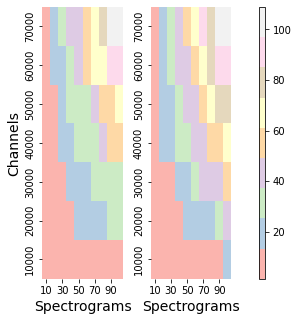

In [37]:
cmaps = ["Pastel1", "RdYlBu_r", "YlGnBu", "Spectral_r", "Set3", "PuBuGn", "PuBu", "PuOr_r", "RdBu_r", ]

# fig, ax =plt.subplots(1,2, figsize=(5,5))
fig, ax = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[4,4,.3]), figsize=(4,5))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

p1 = sns.heatmap(df1, cmap=cmaps[0], ax=ax[0], vmin=min, vmax=max, cbar=False)
p2 = sns.heatmap(df2, cmap=cmaps[0], ax=ax[1], vmin=min, vmax=max, cbar=False)
fig.colorbar(ax[1].collections[0], cax=ax[2])

p1.set_xlabel(f"Spectrograms", fontsize=14)
p1.set_ylabel("Channels", fontsize=14)

p2.set_xlabel("Spectrograms", fontsize=14)
p2.set_ylabel(f"", fontsize=0)

plt.show()

### Browser Performance

In [9]:
r = range(1000, 11000, 1000)
print(list(r), len(r))

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000] 10


In [10]:
num_spectrograms = 77

await producer.start(); 
sleep(2); print(f"started"); count = 1;

for channel in r:
    payload, _ = payload_generator.spectrogram_protobus(num_spectrograms, channel)
    res = await producer.produce(payload, f'{Protocol.PROTOBUF}_{MessageTopic.SPECTROGRAMS}')
    
    print(f"counter = {count}"); count += 1; sleep(1)

print(f"stop")
await producer.stop()

Producer:start: BROKER_INSTANCE = localhost:9092
started
counter = 1
counter = 2
counter = 3
counter = 4
counter = 5
counter = 6
counter = 7
counter = 8
counter = 9
counter = 10
stop
Producer:stop: BROKER_INSTANCE = localhost:9092
